# Laboratory 6

### Prediction of hapiness degree using:
- GBP
- GPB and Freedom
-- La prima avem asa dupa
-- metoda grad desc stocastic
-- metoda grad desc bazat pe batchuri (tool/api/cod propriu)
### Prediction if scan is malign or benign
- tip malformatie : Malign sau benign
- raza : media distantelor intre centru si punctele de pe contur
- textura: masurata prin dev standard a nivelelor de gri din marg asociata!
-- algoritm de clasificare bazat pe regresie logistica.
-- La 2 caracterizeaza dupa asa: daca o leziune cu textura de 10 si val 18 e maligna sau benigna
-- cerinta opt -> fol validare incrucisata
-- investigarea functii de loss
ce se intampla in cazul clas binare daca se modifica pragul de decizie din 0.5 in alte val. cum pot aprecia cal pentru dif valori ale pragului.
- **PREDICTIA E DIN** : ***raza si textura***
### Prediction of flower species
- specii: setosa veresicolor si virginica
- lungime sepala
- latime sepala
- lungimea petala
- latime petala
Using that ^ predict care e specia cu sepala de 5.36cm lung si 3.85 lat si petala de 1.25cm si lata de 0.4cm

In [24]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.datasets import load_iris
#import normalisation
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
import pandas as pd
import certifi

## Load new data

In [2]:
def load_Data(fileName, inputVariableName, outputVariableName):
    data = []
    dataNames = []

    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
                line_count += 1
            else:
                data.append(row)
                line_count += 1

    selectedVariables = [dataNames.index(var) for var in inputVariableName]

    # Initialize sums list to hold sum of each variable
    sums = [0 for i in range(len(data[0])+1)]

    # Replace empty strings with NaN values and calculate column-wise sums
    for var in selectedVariables:
        for i in range(len(data)):
            if data[i][var] == '':
                data[i][var] = np.nan
            else:
                sums[var] += float(data[i][var])
                data[i][var] = float(data[i][var])
        sums[var] /= len(data)  # Calculate column-wise average

    # Replace NaN values with column-wise average
    for var in selectedVariables:
        for i in range(len(data)):
            if np.isnan(data[i][var]):
                data[i][var] = sums[var]

    # Extract input data
    inputs = [[float(data[i][var]) for i in range(len(data))] for var in selectedVariables]

    # Extract output data
    selectedOutput = dataNames.index(outputVariableName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs

## Plotting functions

In [3]:
def plotData3D(trainAtrFirstX=[],trainAtrSecX=[],trainY=[],learntAtrFirstX=[],learntAtrSecondX=[],learntY=[],testAtrFirstX=[],testAtrSecondX=[],testY=[],title='Plotting Something',label1='train data',label2='learnt model',label3='test data',atr1=None,atr2=None,atr3=None):
    ax=plt.axes(projection='3d')
    if(len(trainAtrFirstX)>0):
        plt.scatter(trainAtrFirstX,trainAtrSecX,trainY,c='r',marker='o',label=label1)
    if(len(learntAtrFirstX)>0):
        plt.scatter(learntAtrFirstX,learntAtrSecondX,learntY,c='b',marker='o',label=label2)
    if(len(testAtrFirstX)>0):
        plt.scatter(testAtrFirstX,testAtrSecondX,testY,c='g',marker='^',label=label3)
    plt.title(title)
    plt.xlabel(atr1)
    plt.ylabel(atr2)
    plt.clabel(atr3)
    plt.legend()
    plt.show()

In [4]:
def plotData2D(trainX=[], trainY=[], learntX=[], learntY=[], testX=[], testY=[], title='Plottings something', label1='train data', label2='learnt model', label3='test data',atr1=None,atr2=None):
    # Plot training data
    if len(trainX) > 0:
        plt.plot(trainX, trainY, 'ro', label=label1)

    # Plot learned model
    if len(learntX) > 0:
        plt.plot(learntX, learntY, 'bo', label=label2)

    # Plot testing data
    if len(testX) > 0:
        plt.plot(testX, testY, 'g^', label=label3)
    plt.xlabel(atr1)
    plt.ylabel(atr2)

    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def plotData(trainX=[],trainY=[],learntX=[],learntY=[],testX=[],testY=[],title='Plotting Something',label1='train data',label2='learnt model',label3='test data',attributes=[],outputAtr=None):
    if(len(attributes)==1):
        plotData2D(trainX,trainY,learntX,learntY,testX,testY,title,label1,label2,label3,attributes[0],outputAtr)
    else:
        if (len(trainX)==0 or not (isinstance(trainX[0],list))):
            trainXAtr1,trainXAtr2=[[],[]]
        else:
            trainXAtr1,trainXAtr2=split_Data_Vectors(trainX)
        if len(learntX) ==0 or not (isinstance(learntX[0],list)):
            learntAtr1,learntAtr2=[[],[]]
        else:
            learntAtr1,learntAtr2=split_Data_Vectors(learntX)
        if len (testX)==0 or not (isinstance(testX[0],list)):
            testXAtr1,testXAtr2=[[],[]]
        else:
            testXAtr1,testXAtr2=split_Data_Vectors(testX)
        plotData3D(trainXAtr1,trainXAtr2,trainY,learntAtr1,learntAtr2,learntY,testXAtr1,testXAtr2,testY,title,label1,label2,label3,attributes[0],attributes[1],outputAtr)


In [6]:
def ploatDataHistogram(data,attributeName):
    plt.title('Histogram of '+attributeName)
    n,bins,patches=plt.hist(data,10,facecolor='green',alpha=0.5)
    plt.show()

In [7]:
def plotPredictedData(validationInputs,computedValOut,validationOutputs,attributes=[],outputAtr=None):
    plotData(learntX=validationInputs,learntY=computedValOut,testX=validationInputs,testY=validationOutputs,title='Computed vs Real Test Data',attributes=attributes,outputAtr=outputAtr)

In [8]:
def plot_learnt_3D_model_helper(trainXAtr1, trainXAtr2, w0, w1, w2):
    noOfPoints = 40
    xref1 = []
    val = min(trainXAtr1)
    step1 = (max(trainXAtr1) - min(trainXAtr1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(trainXAtr2)
    step2 = (max(trainXAtr2) - min(trainXAtr2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2
    yref=[w0+w1*el1+w2*el2 for el1,el2 in zip(xref1,xref2)]
    return [xref1,xref2],yref



In [9]:
def plot_learnt_2D_model_helper(inputs, w0, w1):
    noOfPoints = 1000
    min_x = min(inputs)
    max_x = max(inputs)
    step = (max_x - min_x) / noOfPoints
    x_ref = [min_x + i * step for i in range(noOfPoints)]
    y_ref = [w0+w1*el for el in x_ref]
    return x_ref, y_ref

In [10]:
def plot_learnt_model(inputs, outputs,w0, w1, w2=None, attributes=[], outputAtr=None):
    if(len(attributes)>1):
        trainXAtr1= [el[0] for el in inputs]
        trainXAtr2= [el[1] for el in inputs]
        xref,yref=plot_learnt_3D_model_helper(trainXAtr1,trainXAtr2,w0,w1,w2)
    else:
        xref,yref=plot_learnt_2D_model_helper(inputs,w0,w1)
    plotData(inputs,outputs,xref,yref,title='Train data and model',label1='Train data',label2='Learned Model',attributes=attributes,outputAtr=outputAtr)


## Normalizations of data or Utils

In [11]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

In [12]:
def get_data_normalized(inputData, outputData):
    # Normalize input data
    normalizedInputData = [min_max_normalize(inputData[i]) for i in range(len(inputData))]

    # Normalize output data
    normalizedOutputData = min_max_normalize(outputData)

    return normalizedInputData, normalizedOutputData

In [13]:
def standardization_norm(data):
    return (data - data.mean()) / data.std()
def robust_norm(data):
    q75, q25 = np.percentile(data, [75 ,25])
    return (data - np.mean(data)) / (q75 - q25)
def normalization(data,labels,method='min_max'):
    X=[]
    for i in range (0,len(labels)):
        X_atr=[x[i] for x in data]
        X_atr=np.array(X_atr)
        if method=='min_max':
            X_atr=min_max_normalize(X_atr)
        elif method=='standardization':
            X_atr=standardization_norm(X_atr)
        elif method=='robust':
            X_atr=robust_norm(X_atr)
        X.append(X_atr)
    return X

### Utils

In [14]:
def split_Data_Vectors(data):
    dataAtr1=[]
    dataAtr2=[]
    if(isinstance(data[0],list)) and len(data[0])==2:
        dataAtr1=[el[0] for el in data]
        dataAtr2=[el[1] for el in data]
    else:
        dataAtr1=data[0]
        dataAtr2=data[1]
    return dataAtr1,dataAtr2

## Checking linearity

In [15]:
def check_linarity_between_two_data(data1,data2,attributes,output):
    if(len(attributes)==1):
        plotData(data1[0],data2,title=f'Linearity between {attributes[0]} and {output}',label1='train data',attributes=attributes,outputAtr=output)
    else:
        plotData(data1, data2, [[],[]], [], [[],[]], [], f'Linearity between {attributes[0]}&{attributes[1]} vs {output}' , label1='train data',attributes=attributes,outputAtr=output)



In [16]:
def split_data_into_training_and_testing(inputs, outputs, percentage):
    np.random.seed(5)
    indexes = np.random.permutation(len(inputs[0]))
    trainSample = np.random.choice(indexes, int(percentage * len(indexes)))
    validationSample = np.setdiff1d(indexes, trainSample)

    if (len(inputs)>1):  # Two input attributes
        trainInputs = [[inputs[j][i] for j in range(len(inputs))] for i in trainSample]
        validationInputs =[[inputs[j][i] for j in range(len(inputs))] for i in validationSample]
    else:  # One input attribute
        trainInputs = [inputs[0][i] for i in trainSample]
        validationInputs = [inputs[0][i] for i in validationSample]

    trainOutputs = [outputs[i] for i in trainSample]
    validationOutputs = [outputs[i] for i in validationSample]

    return trainInputs, trainOutputs, validationInputs, validationOutputs


In [17]:
def learn_with_tool(inputs,outputs,validationInputs,validationOutputs,attributesInput=[],outputAtr=None):
    if (len(attributesInput)>1):
        # Prepare input features for the model
        xx = inputs
    else:
        # If there's only one input attribute
        xx = [[x] for x in inputs]

        # init model
    regressor=MySGDRegression()
   # regressor = linear_model.SGDRegressor(alpha=0.01,max_iter=1000, tol=1e-3)
    # train
    regressor.fit(xx, outputs)

    # coef
    w0 = regressor.intercept_[0]
    if (len(attributesInput) > 1):
        w1, w2 = regressor.coef_
    else:
        w1, w2 = regressor.coef_[0], None

    return w0, w1, w2, regressor


In [18]:
def predict_new_inputs(w0, w1, w2, regressor, inputs,output,validationInputs,validationOutputs):
    if (len(inputs) > 1 and isinstance(inputs[0], list)):
        xx = inputs
    else:
        xx = [[x] for x in inputs]

    plt.plot(inputs,xx,'yo',label='computed data')
    plt.plot(inputs,output,'ro',label='real data')
    plt.title('Computed vs Real Data')
    plt.legend()
    plt.show()

In [19]:
def differences_pred_vs_real(compValOut,valOut):
    #manual tool
    error=0.0
    for t1,t2 in zip(compValOut,valOut):
        error+=(t1-t2)**2
    error/=len(valOut)
    #acum tool
    mean_error=error=mean_squared_error(valOut,compValOut)
    return error,mean_error

In [20]:
def pred(validationInputs, regressor,attributes=[]):
    if len(attributes)>1:  # Two input attributes
        computedValOut = regressor.predict(validationInputs)
    else:  # One input attribute
        computedValOut = regressor.predict([[el] for el in validationInputs])
    return computedValOut

## MY SGD REGRESSION

In [21]:
class MySGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = []
        x= []
        y = []
    def fit(self,x,y,learningRate=0.001,noEpochs=1000):
        self.coef_=[0.0 for _ in range(len(x[0])+1)]
        for epoch in range(noEpochs):
            for i in range(len(x)):
                ycomputed=self.eval(x[i])
                crtError=ycomputed-y[i]
                for j in range (0,len(x[0])):
                    self.coef_[j]=self.coef_[j]-learningRate*crtError*x[i][j]
                self.coef_[len(x[0])]=self.coef_[len(x[0])]- learningRate*crtError*1
        self.intercept_=[self.coef_[-1]]
        self.coef_=self.coef_[:-1]
    def eval(self,xi):
        yi=self.coef_[-1]
        for j in range (len(xi)):
            yi+=self.coef_[j]*xi[j]
        return yi
    def predict(self,x):
        yComputed=[self.eval(xi) for xi in x]
        return yComputed


In [22]:
def sgdRession(inputAttributes, outPutAttributes,fileName,mode='sklearn'):
    input,output=load_Data(fileName,inputAttributes,outPutAttributes)
    for i in range(len(inputAttributes)):
        input[i]=min_max_normalize(input[i])
    output=min_max_normalize(output)
    i=0
    for atr in inputAttributes:
        ploatDataHistogram(input[i],atr)
        i+=1
    ploatDataHistogram(output,outPutAttributes)
    print('Linearity between objects')
    check_linarity_between_two_data(input,output,inputAttributes,outPutAttributes)
    #split data precentage
    print('Getting the data split for testing and training')
    trainInputs,trainOutputs,validationInputs,validationOutputs=split_data_into_training_and_testing(input,output,0.8)

    plotData(trainInputs,trainOutputs,testX=validationInputs,testY=validationOutputs,title='Training and Testing Data',attributes=inputAttributes,outputAtr=outPutAttributes)
    #learn with tool
    if(mode =='sklearn'):
        w0,w1,w2,regressor=learn_with_tool(trainInputs,trainOutputs,validationInputs,validationOutputs,attributesInput=inputAttributes,outputAtr=outPutAttributes)
        computed=pred(validationInputs,regressor,attributes=inputAttributes)
    if len(inputAttributes)>1:
        print('Coefficients Model with 2 atr:',w0,w1,w2)
        print(f'f(x1,x2)={w0}+{w1}*x1+{w2}*x2')
    else:
        print('Coefficients Model with 1 atr:',w0,w1)
        print(f'f(x)={w0}+{w1}*x')
    plot_learnt_model(trainInputs,trainOutputs,w0,w1,w2,attributes=inputAttributes,outputAtr=outPutAttributes)
    plotPredictedData(validationInputs,computed,validationOutputs,attributes=inputAttributes,outputAtr=outPutAttributes)
    error,toolError=differences_pred_vs_real(computed,validationOutputs)
    print('Error:',error)
    print('Tool Error:',toolError)

## Running the regression

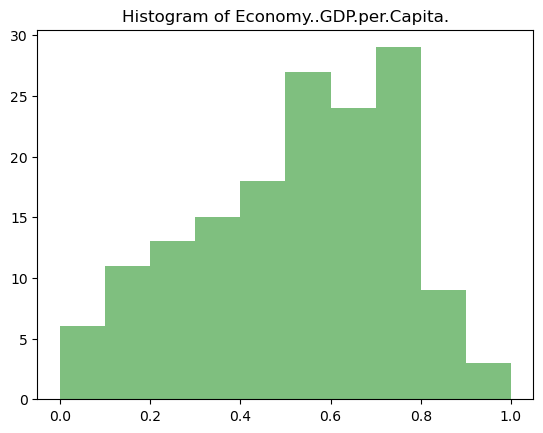

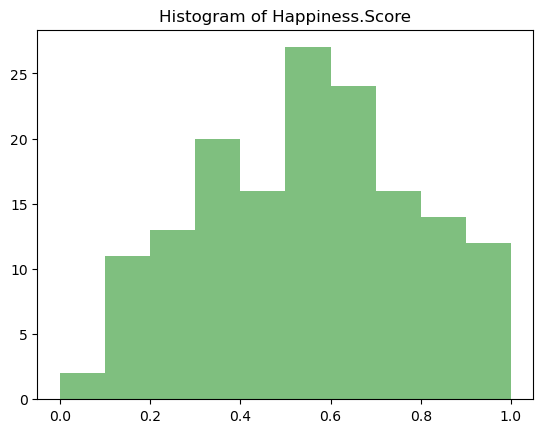

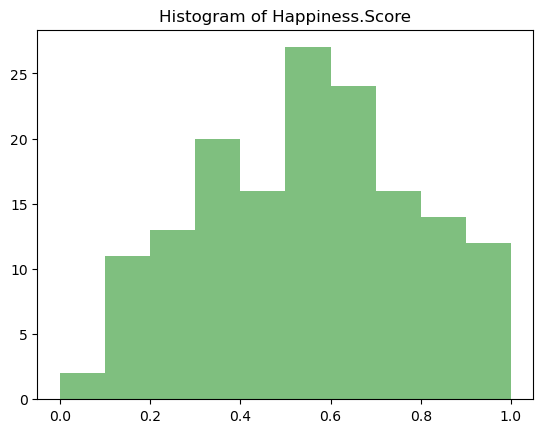

Linearity between objects


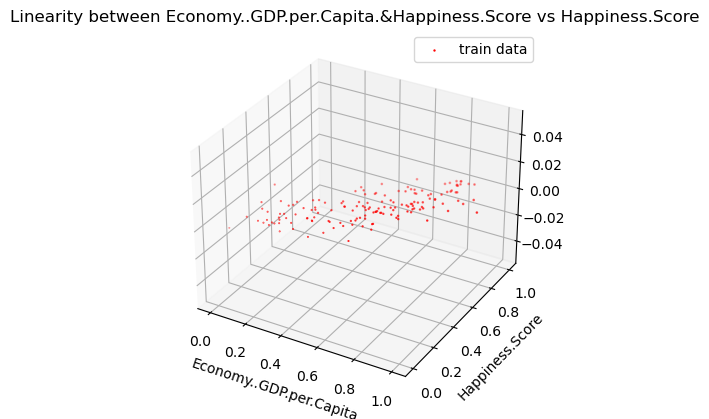

Getting the data split for testing and training


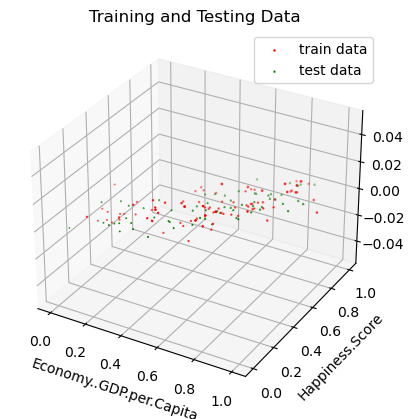

Coefficients Model with 2 atr: 0.0033462417651613546 0.14011014490961055 0.8648480665025892
f(x1,x2)=0.0033462417651613546+0.14011014490961055*x1+0.8648480665025892*x2


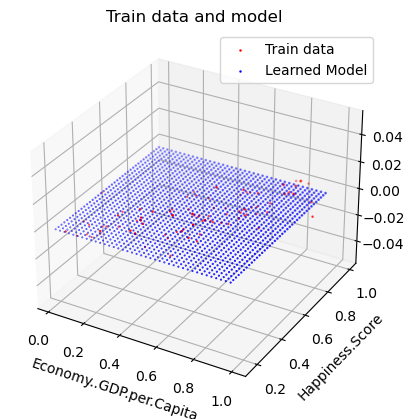

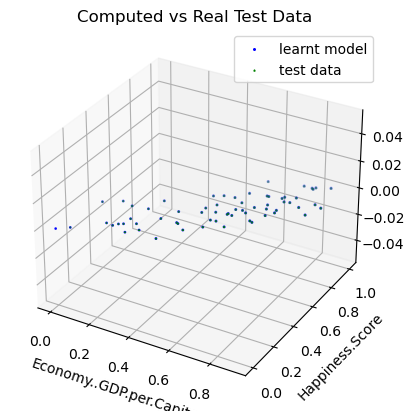

Error: 0.7504695486742411
Tool Error: 0.7504695486742411


In [25]:
sgdRession(['Economy..GDP.per.Capita.','Happiness.Score'],'Happiness.Score','data/world-happiness-2017.csv')


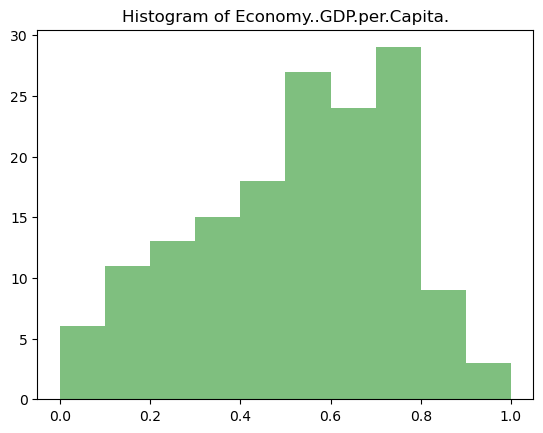

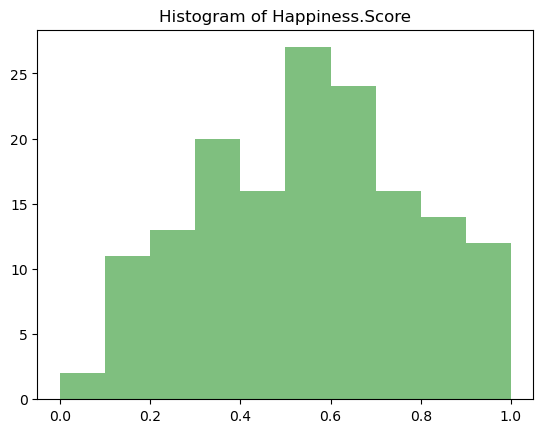

Linearity between objects


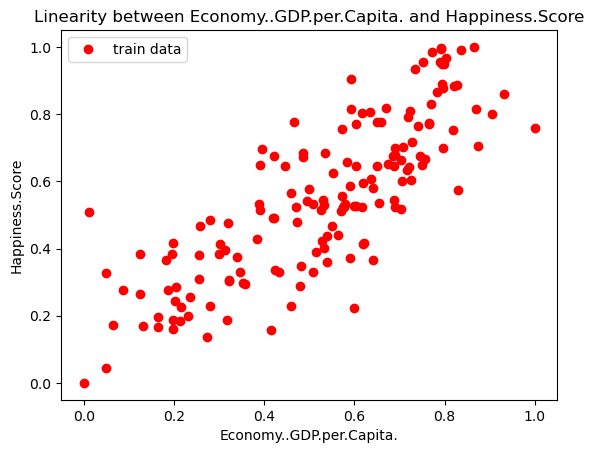

Getting the data split for testing and training


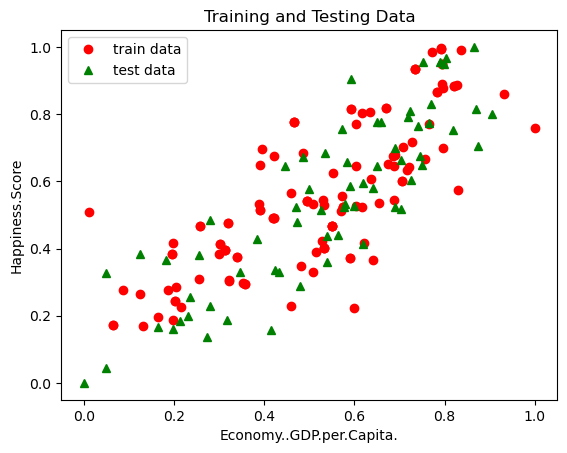

Coefficients Model with 1 atr: 0.14387086846425376 0.8044876576635615
f(x)=0.14387086846425376+0.8044876576635615*x


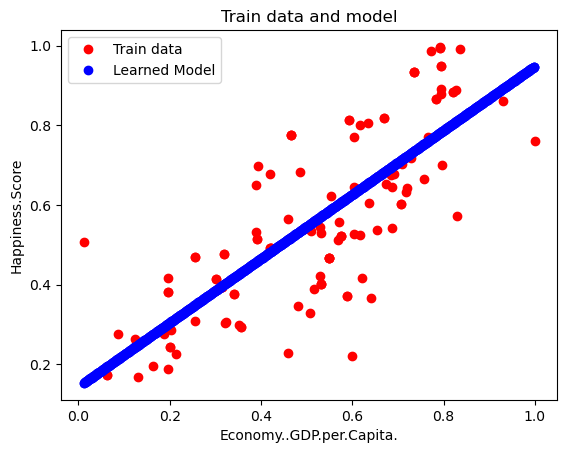

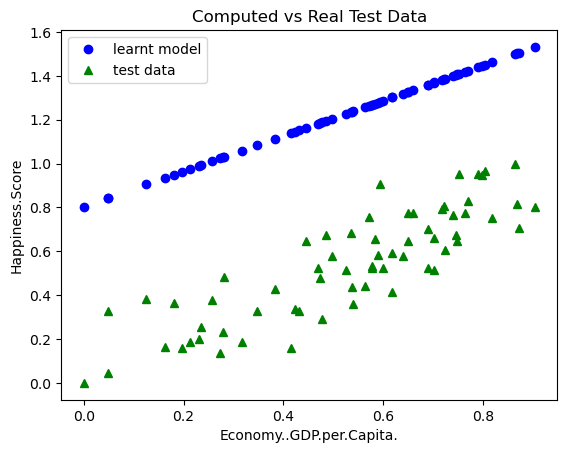

Error: 0.49393995931470486
Tool Error: 0.49393995931470486


In [26]:
sgdRession(['Economy..GDP.per.Capita.'],'Happiness.Score','data/world-happiness-2017.csv')


In [ ]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,iterations=1000,threshold=0.5,loss_function='binary'):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=None
        self.bias=None
        self.losses=[]
        self.threshold=0.5
        self.losFunct=loss_function
    def set_loss_function(self,lossFunct):
        self.losFunct=lossFunct
    def sigmoid(self,z):
        #S(z)=1/(1+e^-z)
        return 1/(1+np.exp(-z))
    def compute_mse_loss(self,y,y_pred):
        return np.mean((y-y_pred)**2)
    def compute_loss_mae(self,y,y_pred):
        return np.mean(np.abs(y-y_pred))
    def compute_huber_loss(self,y,y_pred,delta=1.0):
        loss=np.where(np.abs(y-y_pred)<delta,0.5*((y-y_pred)**2),delta*np.abs(y-y_pred)-0.5*(delta**2))
        return np.mean(loss)
    def compute_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)
        return np.mean(loss)
    def compute_squared_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)**2
        return np.mean(loss)
    def compute_loss_binary(self,y,y_pred):
        epsilon=1e-9
        y1=y*np.log(y_pred+epsilon)
        y2=(1-y)*np.log(1-y_pred+epsilon)
        return -np.mean(y1+y2)
    def compute_loss(self,y,y_pred):
        switcher={
            'mse':self.compute_mse_loss(y,y_pred),
            'mae':self.compute_loss_mae(y,y_pred),
            'huber':self.compute_huber_loss(y,y_pred),
            'hinge':self.compute_hinge_loss(y,y_pred),
            'squared_hinge':self.compute_squared_hinge_loss(y,y_pred),
            'binary':self.compute_loss_binary(y,y_pred)
        }
        return switcher.get(self.losFunct)
    def feed_forward(self,X):
        z=np.dot(X,self.weights)+self.bias
        return self.sigmoid(z)
    def fit(self,X,y):
        num_samples,num_features=X.shape
        self.weights=np.zeros(num_features)
        self.bias=0
        for _ in range(self.iterations):
            A=self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz=A-y #derviate sigmoidului
            #computing grads
            dw=np.dot(X.T,dz)/num_samples
            db=np.sum(dz)/num_samples
            #update weights
            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db
        # print('Final weights:',self.weights)
    def fit_with_cross_validation(self,X,y,num_folds=10):
        kf=KFold(n_splits=num_folds)
        accuracies=[]
        for train_i,val_i in kf.split(X):
            X_train,y_train=X[train_i],y[train_i]
            X_val,y_val=X[val_i],y[val_i]
            self.fit(X_train,y_train)
            predictions=self.predict(X_val)
            acc=self.accuracy(y_val,predictions)
            accuracies.append(acc)
        average_accuracy=np.mean(accuracies)
        print(f'Cross-validation accuracy: {average_accuracy}')
        return average_accuracy
    def setThreshold(self,threshold):
        self.threshold=threshold

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'iterations': self.iterations,
            'threshold': self.threshold,
            'loss_function': self.losFunct
        }
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_pred_prob = self.sigmoid(y_hat)
        y_pred_cls = [1 if prob >= self.threshold else 0 for prob in y_pred_prob]
        return y_pred_cls

    def accuracy(self,y_true,y_pred):
        # y_pred = np.array(y_pred).reshape(-1, 1)
        accuracy=np.sum(y_true==y_pred)/len(y_true)
        return accuracy
    def get_loss(self):
        return self.losses

In [27]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,iterations=1000,threshold=0.5,loss_function='binary'):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=None
        self.bias=None
        self.losses=[]
        self.threshold=0.5
        self.losFunct=loss_function
    def set_loss_function(self,lossFunct):
        self.losFunct=lossFunct
    def sigmoid(self,z):
        #S(z)=1/(1+e^-z)
        return 1/(1+np.exp(-z))
    def compute_mse_loss(self,y,y_pred):
        return np.mean((y-y_pred)**2)
    def compute_loss_mae(self,y,y_pred):
        return np.mean(np.abs(y-y_pred))
    def compute_huber_loss(self,y,y_pred,delta=1.0):
        loss=np.where(np.abs(y-y_pred)<delta,0.5*((y-y_pred)**2),delta*np.abs(y-y_pred)-0.5*(delta**2))
        return np.mean(loss)
    def compute_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)
        return np.mean(loss)
    def compute_squared_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)**2
        return np.mean(loss)
    def compute_loss_binary(self,y,y_pred):
        epsilon=1e-9
        y1=y*np.log(y_pred+epsilon)
        y2=(1-y)*np.log(1-y_pred+epsilon)
        return -np.mean(y1+y2)
    def compute_loss(self,y,y_pred):
        switcher={
            'mse':self.compute_mse_loss(y,y_pred),
            'mae':self.compute_loss_mae(y,y_pred),
            'huber':self.compute_huber_loss(y,y_pred),
            'hinge':self.compute_hinge_loss(y,y_pred),
            'squared_hinge':self.compute_squared_hinge_loss(y,y_pred),
            'binary':self.compute_loss_binary(y,y_pred)
        }
        return switcher.get(self.losFunct)
    def feed_forward(self,X):
        z=np.dot(X,self.weights)+self.bias
        return self.sigmoid(z)
    def fit(self,X,y):
        num_samples,num_features=X.shape
        self.weights=np.zeros(num_features)
        self.bias=0
        for _ in range(self.iterations):
            A=self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz=A-y #derviate sigmoidului
            #computing grads
            dw=np.dot(X.T,dz)/num_samples
            db=np.sum(dz)/num_samples
            #update weights
            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db
        # print('Final weights:',self.weights)
    def fit_with_cross_validation(self,X,y,num_folds=10):
        kf=KFold(n_splits=num_folds)
        accuracies=[]
        for train_i,val_i in kf.split(X):
            X_train,y_train=X[train_i],y[train_i]
            X_val,y_val=X[val_i],y[val_i]
            self.fit(X_train,y_train)
            predictions=self.predict(X_val)
            acc=self.accuracy(y_val,predictions)
            accuracies.append(acc)
        average_accuracy=np.mean(accuracies)
        print(f'Cross-validation accuracy: {average_accuracy}')
        return average_accuracy
    def setThreshold(self,threshold):
        self.threshold=threshold

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'iterations': self.iterations,
            'threshold': self.threshold,
            'loss_function': self.losFunct
        }
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_pred_prob = self.sigmoid(y_hat)
        y_pred_cls = [1 if prob >= self.threshold else 0 for prob in y_pred_prob]
        return y_pred_cls

    def accuracy(self,y_true,y_pred):
        # y_pred = np.array(y_pred).reshape(-1, 1)
        accuracy=np.sum(y_true==y_pred)/len(y_true)
        return accuracy
    def get_loss(self):
        return self.losses

## MY LOGISTIC REGRESSION

In [28]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,iterations=1000,threshold=0.5,loss_function='binary'):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.weights=None
        self.bias=None
        self.losses=[]
        self.threshold=0.5
        self.losFunct=loss_function
    def set_loss_function(self,lossFunct):
        self.losFunct=lossFunct
    def sigmoid(self,z):
        #S(z)=1/(1+e^-z)
        return 1/(1+np.exp(-z))
    def compute_mse_loss(self,y,y_pred):
        return np.mean((y-y_pred)**2)
    def compute_loss_mae(self,y,y_pred):
        return np.mean(np.abs(y-y_pred))
    def compute_huber_loss(self,y,y_pred,delta=1.0):
        loss=np.where(np.abs(y-y_pred)<delta,0.5*((y-y_pred)**2),delta*np.abs(y-y_pred)-0.5*(delta**2))
        return np.mean(loss)
    def compute_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)
        return np.mean(loss)
    def compute_squared_hinge_loss(self,y,y_pred):
        loss=np.maximum(0,1-y*y_pred)**2
        return np.mean(loss)
    def compute_loss_binary(self,y,y_pred):
        epsilon=1e-9
        y1=y*np.log(y_pred+epsilon)
        y2=(1-y)*np.log(1-y_pred+epsilon)
        return -np.mean(y1+y2)
    def compute_loss(self,y,y_pred):
        switcher={
            'mse':self.compute_mse_loss(y,y_pred),
            'mae':self.compute_loss_mae(y,y_pred),
            'huber':self.compute_huber_loss(y,y_pred),
            'hinge':self.compute_hinge_loss(y,y_pred),
            'squared_hinge':self.compute_squared_hinge_loss(y,y_pred),
            'binary':self.compute_loss_binary(y,y_pred)
        }
        return switcher.get(self.losFunct)
    def feed_forward(self,X):
        z=np.dot(X,self.weights)+self.bias
        return self.sigmoid(z)
    def fit(self,X,y):
        num_samples,num_features=X.shape
        self.weights=np.zeros(num_features)
        self.bias=0
        for _ in range(self.iterations):
            A=self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz=A-y #derviate sigmoidului
            #computing grads
            dw=np.dot(X.T,dz)/num_samples
            db=np.sum(dz)/num_samples
            #update weights
            self.weights-=self.learning_rate*dw
            self.bias-=self.learning_rate*db
        # print('Final weights:',self.weights)
    def fit_with_cross_validation(self,X,y,num_folds=10):
        kf=KFold(n_splits=num_folds)
        accuracies=[]
        for train_i,val_i in kf.split(X):
            X_train,y_train=X[train_i],y[train_i]
            X_val,y_val=X[val_i],y[val_i]
            self.fit(X_train,y_train)
            predictions=self.predict(X_val)
            acc=self.accuracy(y_val,predictions)
            accuracies.append(acc)
        average_accuracy=np.mean(accuracies)
        print(f'Cross-validation accuracy: {average_accuracy}')
        return average_accuracy
    def setThreshold(self,threshold):
        self.threshold=threshold

    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate,
            'iterations': self.iterations,
            'threshold': self.threshold,
            'loss_function': self.losFunct
        }
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def predict(self, X):
        y_hat = np.dot(X, self.weights) + self.bias
        y_pred_prob = self.sigmoid(y_hat)
        y_pred_cls = [1 if prob >= self.threshold else 0 for prob in y_pred_prob]
        return y_pred_cls

    def accuracy(self,y_true,y_pred):
        # y_pred = np.array(y_pred).reshape(-1, 1)
        accuracy=np.sum(y_true==y_pred)/len(y_true)
        return accuracy
    def get_loss(self):
        return self.losses

# My logstic

In [39]:
def my_logistic_regression(X_train,y_train,x_test,y_test,X,y,labels_to_analyze,iterations=1000,learning_rate=0.01,loss_function='binary'):
    print(
        'Logistic mine regression\n'
    )
    model=LogisticRegression(learning_rate=learning_rate,iterations=iterations,threshold=0.5)
    model.set_loss_function(loss_function)
    model.fit(X_train,y_train)
    losses = model.get_loss()
    # find_best_hyperparameters(X_train,y_train,x_test,y_test)
    plt.plot(range(model.iterations), losses)
    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()
    model.losses= []
    model.fit_with_cross_validation(X_train,y_train)

    y_pred=model.predict(x_test)
    print('Predicted:',y_pred)
    w0,w1,w2=model.bias,model.weights[0], model.weights[1]
    print(f'classification model: y(feat1, feat2) = {w0} + {w1} * {labels_to_analyze[0]} + {w2} * {labels_to_analyze[1]}')
    acc=model.accuracy(y_test,y_pred)
    print('Accuracy:',acc)

    return model

## SKLEARN

In [40]:
def sklearn_logistic_regression(X_train,y_train,x_test,y_test,X,y,labels_to_analyze,l_rate=0.01,iterations=1000):
    print('Logistic regression sklearn\n')
    model=linear_model.LogisticRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    print('Predicted:',y_pred)
    w0,w1,w2=model.intercept_[0],model.coef_[0][0],model.coef_[0][1]
    print(f'classification model: y(feat1, feat2) = {w0} + {w1} * {labels_to_analyze[0]} + {w2} * {labels_to_analyze[1]}')
    acc=model.score(x_test,y_test)
    print('Accuracy:',acc)
    return model

### Find best hyper

In [41]:
def find_best_hyperparameters(X_train,y_train,x_test,y_test):
    param_grid = {
        'learning_rate': [0.1, 0.01, 0.001],
        'iterations': [1000, 2000, 3000],
        'threshold': [0.5, 0.6, 0.7],
        'loss_function': ['mse', 'mae', 'huber', 'hinge', 'squared_hinge', 'binary']
    }

    # Create the grid search object
    grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Evaluate the model with the best hyperparameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = best_model.accuracy(y_test, y_pred)
    print("Accuracy with best hyperparameters:", accuracy)
    return best_model

## BREAST CANCER

In [42]:
def breast_cancer():
    data = load_breast_cancer()

    # Access the features (X) and target (y)
    allData = data.data  # Features
    y = data.target  # Target (0 for malignant, 1 for benign)

    # Print feature names
    print("Feature names:", data.feature_names)
    # Print target names
    print("Target names:", data.target_names)
    labels_to_analyze=['mean radius','mean texture','target']
    # Create a pandas dataframe
    df = pd.DataFrame(data=allData, columns=data.feature_names)
    df['target'] = y
    XRad=df['mean radius'].values
    XText=df['mean texture'].values
    y=df['target'].values

    #normalize data
    XRad=min_max_normalize(XRad)
    XText=min_max_normalize(XText)
    # y=min_max_normalize(y)
    X = [XRad, XText]
    #spliting

    X_train, y_train, X_test, y_test = split_data_into_training_and_testing(X, y, 0.8)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    #my logistic regression
    model=my_logistic_regression(X_train,y_train,X_test,y_test,X,y,labels_to_analyze,iterations=1000,learning_rate=0.2,loss_function='binary')
    val_pred=model.predict([[18,10]])
    print('Predicted output by my model:')
    if(val_pred==0):
        print('Malignant')
    else:
        print('Benign')
    print('---------------------------------\n\n')
    # sklearn logistic regression
    model=sklearn_logistic_regression(X_train,y_train,X_test,y_test,X,y,labels_to_analyze)
    #seeing for lesziune cuc vals
    print('Predicted output by sklearn model:')
    val_pred=model.predict([[18,10]])
    if(val_pred==0):
        print('Malignant')
    else:
        print('Benign')

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Logistic mine regression



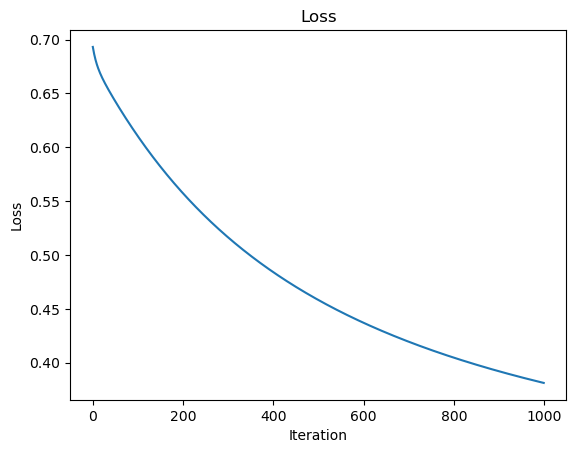

Cross-validation accuracy: 0.8703381642512076
Predicted: [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
classification model: y(feat1, feat2) = 3.342962339446272 + -6.0491005818759085 * mean radius + -2.5536016096251957 * mean texture
Accuracy: 0.8634538152610441
Predicted output by my model:
Benig

In [43]:
breast_cancer()

## IRIS

In [37]:
def iris():
    data=load_iris(as_frame=True).frame
    labels=list(data.columns)
    print(labels)
    #normalize data
    # data=normalisation.standardisation_norm(data,labels[:-1])
    #divide into train and test data
    X=data[labels[:-1]].values
    y=data[labels[-1]].values
    # X=normalization(X,labels[:-1],method='min_max')
    #X=normalization(X,labels[:-1],method='standardization')
    X=normalization(X,labels[:-1],method='robust')


    # y=min_max_normalize(y)
    # y=min_max_normalize(y)
    print(y)
    X_train,y_train,X_test,y_test=split_data_into_training_and_testing(X,y,0.8)
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_test=np.array(X_test)
    y_test=np.array(y_test)
    #my logistic regression
    model=my_logistic_regression(X_train,y_train,X_test,y_test,X,y,labels[:-1],iterations=2000,learning_rate=0.1,loss_function='binary')
    val_pred=model.predict([[5.35,3.85,1.25,0.4]])
    print('Predicted output by my model norm:')
    #print(val_pred)
    if(val_pred==0):
        print('Setosa')
    elif(val_pred==1):
        print('Versicolor')
    else:
        print('Virginica')

    print('---------------------------------\n\n')
    # sklearn logistic regression
    model=sklearn_logistic_regression(X_train,y_train,X_test,y_test,X,y,labels[:-1])
    val_pred=model.predict([[5.35,3.85,1.25,0.4]])
    print('Predicted output by sklearn model:')
    #print(val_pred)
    if (val_pred == 0):
        print('Setosa')
    elif (val_pred == 1):
        print('Versicolor')
    else:
        print('Virginica')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Logistic mine regression



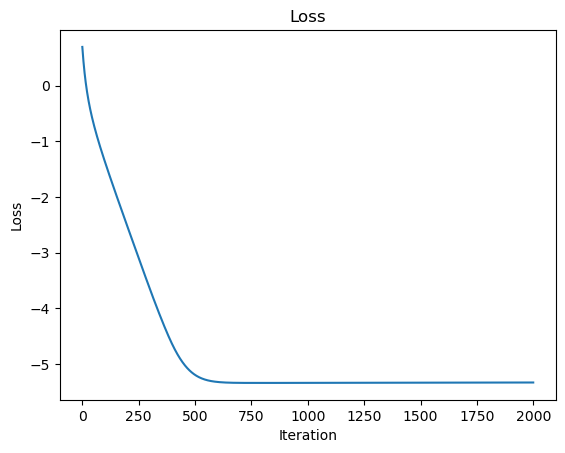

Cross-validation accuracy: 0.7333333333333334
Predicted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
classification model: y(feat1, feat2) = 52.8253292520855 + 24.82562795220164 * sepal length (cm) + -15.659608031863128 * sepal width (cm)
Accuracy: 0.6031746031746031
Predicted output by my model norm:
Virginica
---------------------------------


Logistic regression sklearn

Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]
classification model: y(feat1, feat2) = -0.35672205932945594 + -1.4764605437760494 * sepal length (cm) + 1.3719678739785401 * sepal width (cm)
Accuracy: 0.9682539682539683
Predicted output by sklearn model:
Virginica


In [38]:
iris()
